# ML Algorithms Crash Course

### Why Use Machine Learning?
- Problems for which existing solutions require a lot of fine-tuning or long lists of rules (a machine learning model can often simplify code and perform better than the traditional approach)
- Complex problems for which there is no good solution at all using a traditional approach
- Fluctuating environments: a machine learning system can adapt to new data
- Getting insights about complex problems and large amounts of data


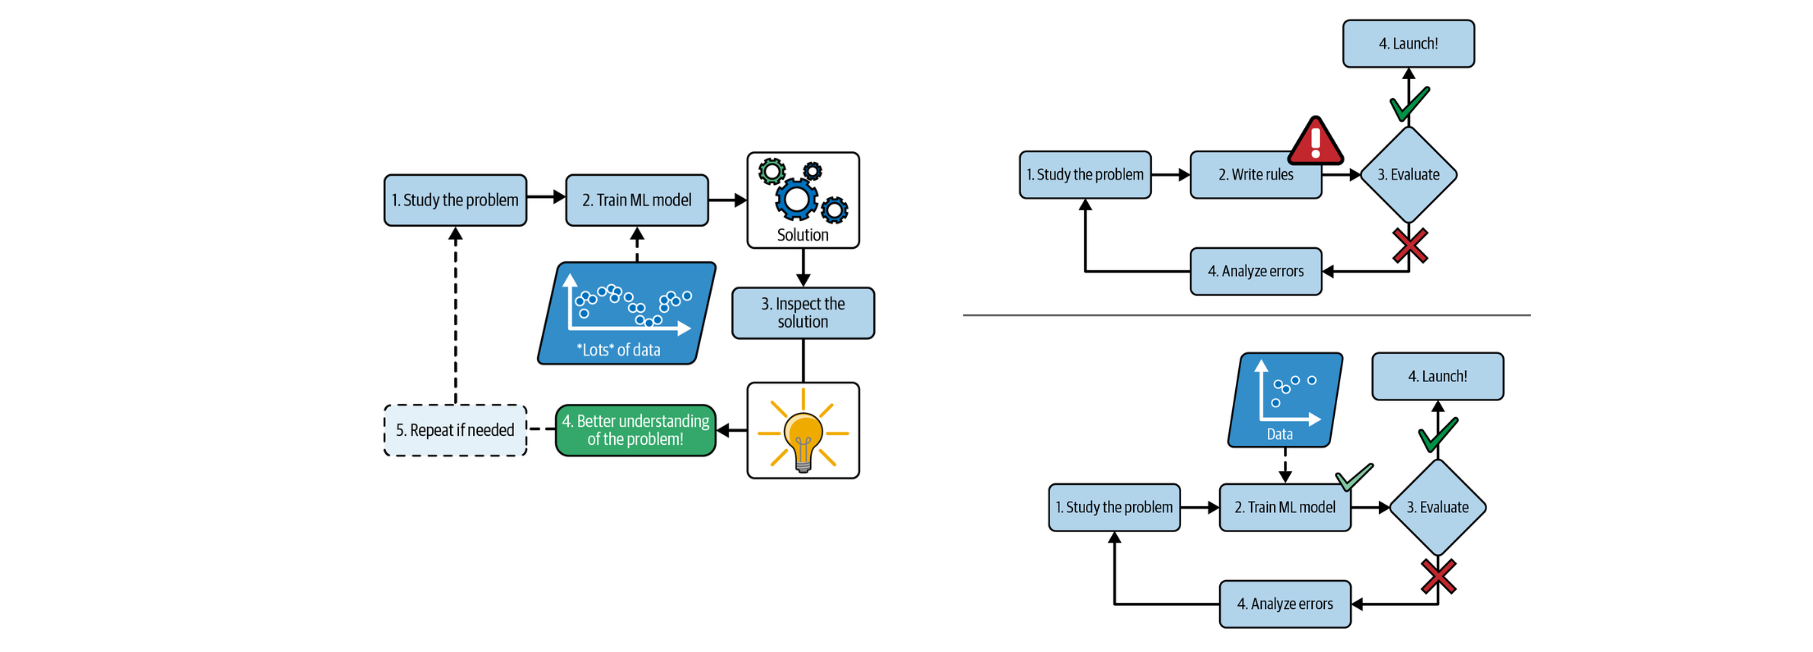

### Types of Machine Learning Systems


- **Supervised Learning**: The training data you feed to the algorithm includes the desired solutions, called labels.
    - **Regression**: The model is trained with labeled data, and it is asked to predict a continuous value.
    - **Classification**: The model is trained with labeled data, and it is asked to predict the label of a new instance.

- **Unsupervised Learning**: The training data is unlabeled.
    - **Clustering**: The model is trained to group similar instances together.
    - **Anomaly detection**: The model is trained to detect anomalies in the data.
    - **Dimensionality reduction**: The model is trained to simplify the data without losing too much information.
- **Semisupervised Learning**: The training data is partially labeled.
- **Self-supervised Learning**: The training data is automatically labeled by the system itself.
- **Reinforcement Learning**: The learning system, called an agent in this context, can observe the environment, select and perform actions, and get rewards in return (or penalties in the form of negative rewards). It must then learn by itself what is the best strategy, called a policy, to get the most reward over time.


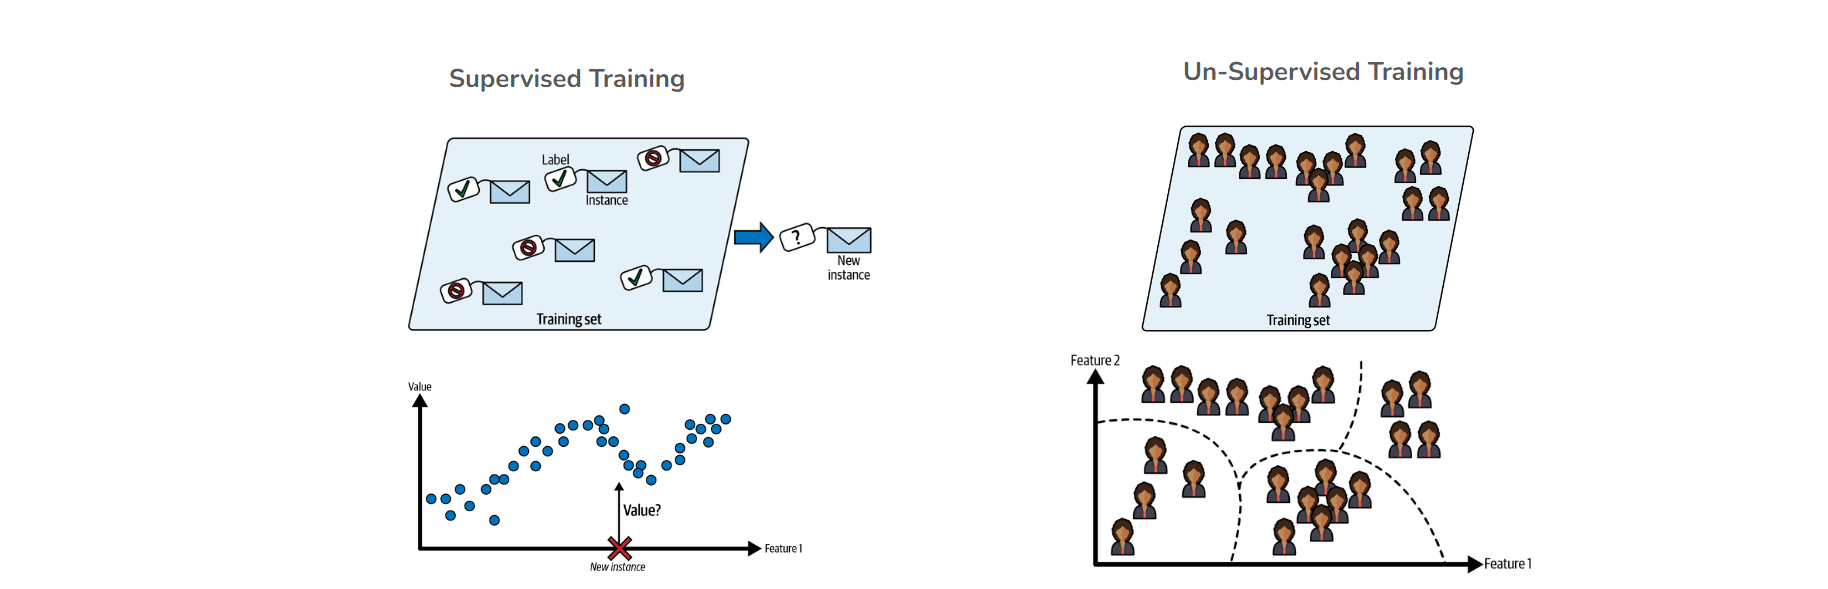

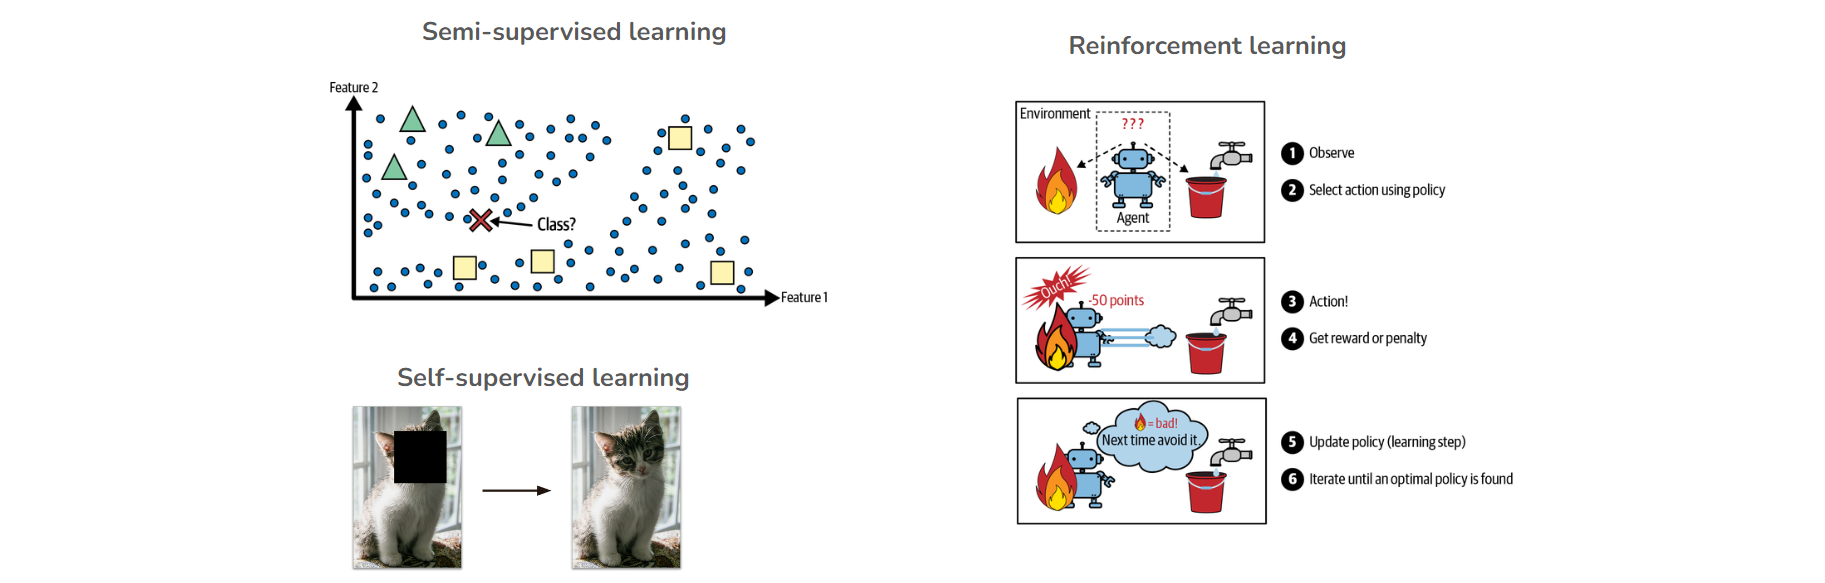

## **Regression**


- **Linear Regression**: The model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term).
- **Polynomial Regression**: A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features.
- **Regularized Linear Models**: Regularization is a way to constrain a model to make it simpler and reduce the risk of overfitting.


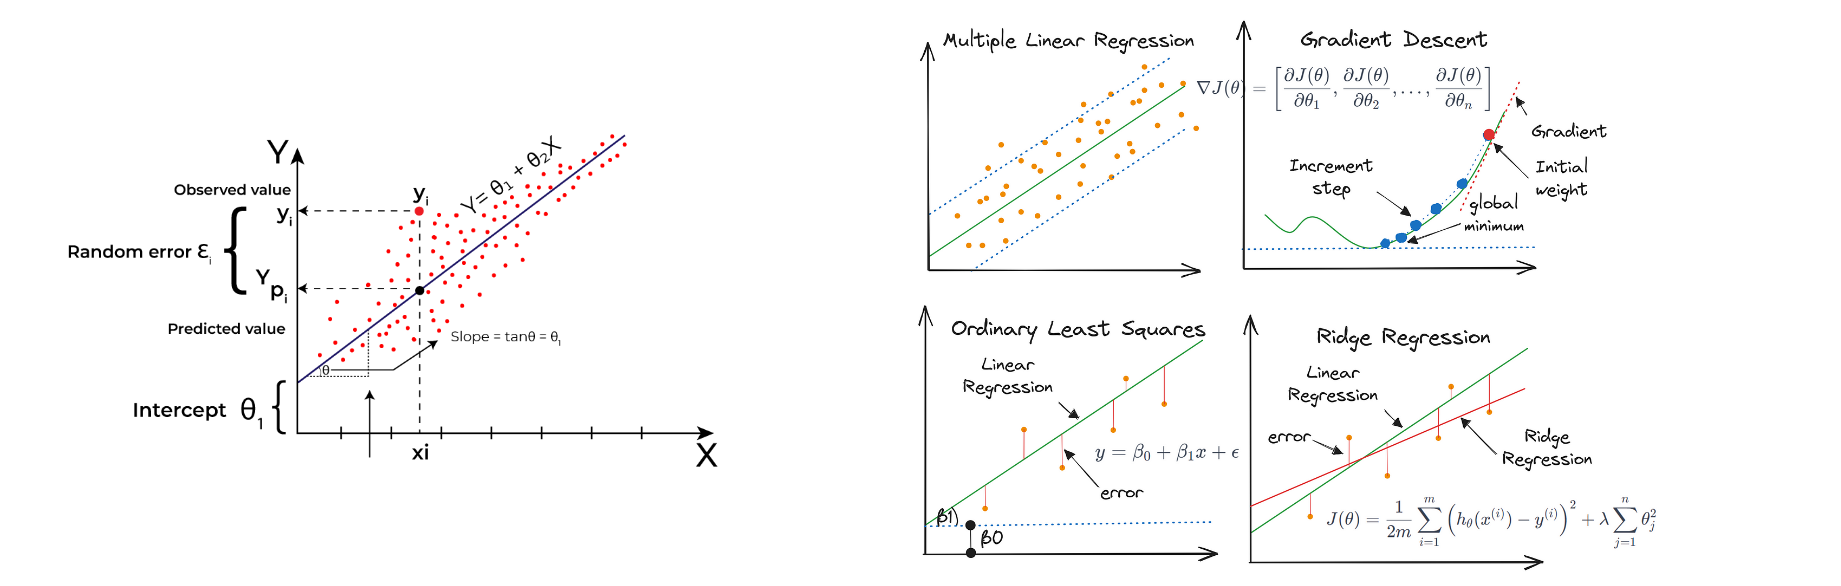

#### Linear Regression Cost Function
- **Mean Squared Error (MSE)**: The most common performance measure of a regression model. It is the average of the squared differences between the predicted and actual values.
    - Formula: $MSE(X, h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\theta^T \cdot x^{(i)} - y^{(i)})^2$
- **Root Mean Squared Error (RMSE)**: The square root of the MSE.
    - Formula: $RMSE(X, h_{\theta}) = \sqrt{MSE(X, h_{\theta})}$
- **Mean Absolute Error (MAE)**: The average of the absolute differences between the predicted and actual values.
    - Formula: $MAE(X, h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m} |\theta^T \cdot x^{(i)} - y^{(i)}|$
- **Huber Loss**: A combination of MSE and MAE. It is quadratic for small errors and linear for large errors.
    - Formula: $L_{\delta}(y, f(x)) = \begin{cases} \frac{1}{2}(y - f(x))^2 & \text{for } |y - f(x)| \leq \delta \\ \delta(|y - f(x)| - \frac{1}{2}\delta) & \text{otherwise} \end{cases}$

#### Regression Evaluation Metrics
- **R-Squared (Coefficient of Determination)**: The proportion of the variance in the dependent variable that is predictable from the independent variable(s).
    - Formula: $R^2 = 1 - \frac{\sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2}{\sum_{i=1}^{m} (y^{(i)} - \bar{y})^2}$
- **Adjusted R-Squared**: The R-squared value adjusted for the number of predictors in the model.
    - Formula: $R^2_{adj} = 1 - \frac{(1 - R^2)(n - 1)}{n - k - 1}$
    - where $n$ is the number of observations and $k$ is the number of predictors.


#### Linear Regression Code

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
california = fetch_california_housing()

In [3]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
# print(california.DESCR)

In [5]:
X = california.data
y = california.target

In [6]:
X.shape, y.shape

((20640, 8), (20640,))

In [7]:
print(california.target_names)
print(california.feature_names)

['MedHouseVal']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
# y = theta0 + theta1*x
# y = w0 + w1*x
# y = beta0 + beta1*x
# y = theta1 + theta2*x

X[0]


array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
model =  LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [13]:
model =  LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.5289841670367237, 0.5943232652466182)

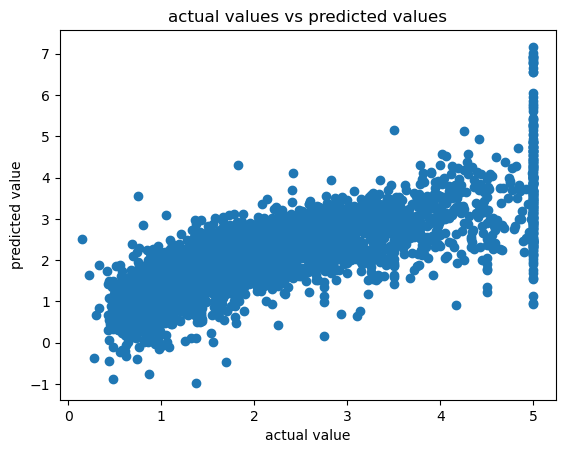

In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('actual values vs predicted values')
plt.show()